# O Trabalho devera ser realizado de forma individual e ser enviado via e-mail até 23:59 do dia 26/06/2023
email para enviar o trabalho: arthur.siqueira@ceub.edu.br

In [1]:
# nome: Leão Pereira  
# RA: 22200115

# Projeto: Análise e Previsão do Preço de Notebooks
***

# Parte 1: Importação e Limpeza dos Dados
***

#### 1. Importação das bibliotecas necessárias
- Importe todas as bibliotecas relevantes para o projeto, como `pandas`, `numpy`, `matplotlib`, `sklearn` e outras que forem pertinentes.
***

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import KFold
from keras.regularizers import l2
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model

#### 2. Carregamento dos dados
- Os dados a serem analisados serão obtidos a partir da base de dados `preco_notebooks.csv`, que contém informações diversas sobre notebooks, bem como o respectivo preço.
***

In [3]:
df = pd.read_csv('notebooks.csv')

# Parte 2: Análise Exploratória de Dados (EDA)
***

#### 3. Análise descritiva
- Realize uma análise descritiva inicial dos dados, gerando estatísticas resumidas (média, mediana, moda, etc.), valores núlos...
***

In [4]:
df.head()

,marca,ano,qtd_nucleos,qtd_threads,ram,gpu_dedicada,ram_gpu,entradas_usb,duracao_bateria,resolucao_tela,tipo_tela,tela_touch,armazenamento_hdd,armazenamento_ssd,segmento,valor
0,apple,2020.0,6,8.0,8,não,0,2.0,461.0,4K,AMOLED,não,0,250.0,NaN,18993
1,asus,2010.0,6,10.0,8,não,0,2.0,523.0,FULLHD,AMOLED,não,500,NaN,NaN,17637
2,huawei,NaN,6,12.0,16,não,0,2.0,546.0,4K,AMOLED,não,0,NaN,NaN,26000
3,apple,2015.0,10,17.0,8,não,0,3.0,571.0,FULLHD,AMOLED,não,0,250.0,NaN,20513
4,apple,NaN,10,11.0,16,não,0,2.0,477.0,QUADHD,OLED,não,0,500.0,NaN,23387


In [5]:
df.describe()

,ano,qtd_nucleos,qtd_threads,ram,ram_gpu,entradas_usb,duracao_bateria,armazenamento_hdd,armazenamento_ssd,valor
count,68034.000000,90000.000000,75925.000000,90000.000000,90000.000000,81455.000000,83906.000000,90000.000000,81415.000000,90000.000000
mean,2016.500397,7.320222,10.973645,13.738644,1.210311,2.613860,346.450182,333.086111,608.373764,15241.639978
std,4.019971,2.931961,5.066873,10.562201,2.330705,0.884701,191.563514,575.373998,643.676331,6091.971693
min,2010.000000,2.000000,2.000000,2.000000,0.000000,1.000000,30.000000,0.000000,0.000000,2667.000000
25%,2013.000000,4.000000,7.000000,8.000000,0.000000,2.000000,150.000000,0.000000,250.000000,9777.000000
50%,2017.000000,8.000000,10.000000,12.000000,0.000000,3.000000,420.000000,0.000000,250.000000,16031.000000
75%,2020.000000,10.000000,14.000000,16.000000,0.000000,3.000000,522.000000,500.000000,1000.000000,20152.000000
max,2023.000000,12.000000,24.000000,64.000000,12.000000,4.000000,600.000000,2000.000000,2000.000000,28503.000000


In [6]:
df.describe(include = 'O')

,marca,gpu_dedicada,resolucao_tela,tipo_tela,tela_touch,segmento
count,89372,90000,90000,90000,90000,89990
unique,11,2,4,5,2,8
top,xiaomi,não,FULLHD,OLED,não,premium
freq,8284,68292,37465,27208,82465,34399


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              89372 non-null  object 
 1   ano                68034 non-null  float64
 2   qtd_nucleos        90000 non-null  int64  
 3   qtd_threads        75925 non-null  float64
 4   ram                90000 non-null  int64  
 5   gpu_dedicada       90000 non-null  object 
 6   ram_gpu            90000 non-null  int64  
 7   entradas_usb       81455 non-null  float64
 8   duracao_bateria    83906 non-null  float64
 9   resolucao_tela     90000 non-null  object 
 10  tipo_tela          90000 non-null  object 
 11  tela_touch         90000 non-null  object 
 12  armazenamento_hdd  90000 non-null  int64  
 13  armazenamento_ssd  81415 non-null  float64
 14  segmento           89990 non-null  object 
 15  valor              90000 non-null  int64  
dtypes: float64(5), int64(5

#### 4. Análise dos atributos dos notebooks
- Quais marcas tendem a ser mais caras?
***

In [8]:
preco = df.groupby('marca')['valor'].mean().round(3)
preco = preco.apply(lambda x: f'R$ {x:.2f}')

In [9]:
preco_caro = preco.sort_values(ascending=False)

In [10]:
preco_caro

marca
positivo     R$ 6077.82
huawei      R$ 20551.56
xiaomi      R$ 20530.46
apple       R$ 20520.45
razer       R$ 19592.92
asus        R$ 13959.57
lenovo      R$ 13571.65
samsung     R$ 13551.02
dell        R$ 13512.59
acer        R$ 13498.40
hp          R$ 12372.00
Name: valor, dtype: object

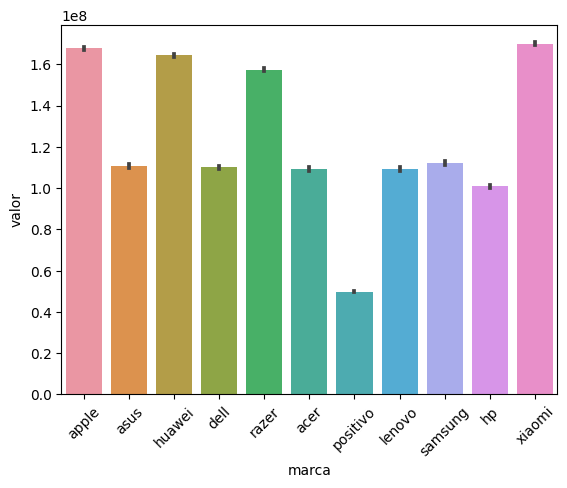

In [11]:
sns.barplot(x='marca', y='valor', data=df, estimator=sum)
plt.xticks(rotation=45)
plt.show()

# Parte 3: Pré-processamento de Dados
***

#### 5. Tratamento de dados núlos
- Verifique a presença de valores nulos nos dados e trate-os de maneira adequada.
***

In [12]:
df.isna().sum() *100 / len(df)

marca                 0.697778
ano                  24.406667
qtd_nucleos           0.000000
qtd_threads          15.638889
ram                   0.000000
gpu_dedicada          0.000000
ram_gpu               0.000000
entradas_usb          9.494444
duracao_bateria       6.771111
resolucao_tela        0.000000
tipo_tela             0.000000
tela_touch            0.000000
armazenamento_hdd     0.000000
armazenamento_ssd     9.538889
segmento              0.011111
valor                 0.000000
dtype: float64

In [13]:
df['marca'].unique()

array(['apple', 'asus', 'huawei', 'dell', 'razer', 'acer', 'positivo',
       'lenovo', 'samsung', 'hp', 'xiaomi', nan], dtype=object)

In [14]:
df = df.dropna(subset=['marca', 'segmento'])

In [15]:
df.isna().sum()

marca                    0
ano                  21819
qtd_nucleos              0
qtd_threads          13966
ram                      0
gpu_dedicada             0
ram_gpu                  0
entradas_usb          8480
duracao_bateria       6050
resolucao_tela           0
tipo_tela                0
tela_touch               0
armazenamento_hdd        0
armazenamento_ssd     8509
segmento                 0
valor                    0
dtype: int64

In [16]:
df['ano'].describe()

count    67543.000000
mean      2016.502021
std          4.020217
min       2010.000000
25%       2013.000000
50%       2017.000000
75%       2020.000000
max       2023.000000
Name: ano, dtype: float64

In [17]:
df['duracao_bateria'].describe()

count    83312.000000
mean       346.423576
std        191.584136
min         30.000000
25%        150.000000
50%        420.000000
75%        522.000000
max        600.000000
Name: duracao_bateria, dtype: float64

In [18]:
df.loc[df['ano'].isna(),'ano'] = '2016'
df.loc[df['duracao_bateria'].isna(),'duracao_bateria'] = '346.000000'

In [19]:
# Substituir NaN por valores interpolados na coluna 'valor'
# a escolha pelo metodo spline se deve a variação de dados, já que a linear (padrão) não é a melhor para capturar variação de dados
df['qtd_threads'].interpolate(method='spline', order=2, inplace=True)



In [20]:
df['armazenamento_ssd'].interpolate(method='spline', order=2, inplace=True)

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [21]:
df['entradas_usb'].fillna(df['entradas_usb'].mean(), inplace=True)

In [22]:
df.isna().sum()

marca                0
ano                  0
qtd_nucleos          0
qtd_threads          0
ram                  0
gpu_dedicada         0
ram_gpu              0
entradas_usb         0
duracao_bateria      0
resolucao_tela       0
tipo_tela            0
tela_touch           0
armazenamento_hdd    0
armazenamento_ssd    0
segmento             0
valor                0
dtype: int64

#### 6. Manipulação de variáveis categóricas
- Trate as variáveis categóricas presentes no dataset (colunas do tipo object), como a `marca` e `segmento`. Utilize a função `.loc` do pandas ou o `LabelEncoder` do sklearn.
***

In [23]:
df['ano'] = df['ano'].astype('int64')
df['duracao_bateria'] = df['duracao_bateria'].astype('float64')

In [24]:
df['gpu_dedicada'] = df['gpu_dedicada'].map({'sim': 1, 'não': 0})
df['tela_touch'] = df['tela_touch'].map({'sim': 1, 'não': 0})

#### 7. Separação dos dados
- Separe os dados em atributos (X) e alvo (y), sendo o preço do notebook o alvo.
***

In [25]:
X = df[df.columns[:-1]]
y = df[['valor']]

#### 8. Normalização dos dados
- Normalizar o X utilizando a função `MinMaxScaler` do sklearn.
- Normalizar o y utilizando a função `MinMaxScaler` do sklearn.
***

In [26]:
X.describe(include = 'O')

,marca,resolucao_tela,tipo_tela,segmento
count,89362,89362,89362,89362
unique,11,4,5,8
top,xiaomi,FULLHD,OLED,premium
freq,8284,37209,27036,34169


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89362 entries, 10 to 89999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              89362 non-null  object 
 1   ano                89362 non-null  int64  
 2   qtd_nucleos        89362 non-null  int64  
 3   qtd_threads        89362 non-null  float64
 4   ram                89362 non-null  int64  
 5   gpu_dedicada       89362 non-null  int64  
 6   ram_gpu            89362 non-null  int64  
 7   entradas_usb       89362 non-null  float64
 8   duracao_bateria    89362 non-null  float64
 9   resolucao_tela     89362 non-null  object 
 10  tipo_tela          89362 non-null  object 
 11  tela_touch         89362 non-null  int64  
 12  armazenamento_hdd  89362 non-null  int64  
 13  armazenamento_ssd  89362 non-null  float64
 14  segmento           89362 non-null  object 
dtypes: float64(4), int64(7), object(4)
memory usage: 10.9+ MB


In [28]:
from sklearn.preprocessing import MinMaxScaler
#numeric_cols = ['ano', 'qtd_nucleos', 'qtd_threads', 'ram', 'gpu_dedicada', 'ram_gpu', 'entradas_usb', 'duracao_bateria', 'tela_touch', 'armazenamento_ssd']  # Assuming the first three columns are numeric
#categorical_cols = ['marca', 'resolucao_tela', 'tipo_tela', 'segmento']
# Realizar codificação one-hot das colunas categóricas usando get_dummies
X_encoded = pd.get_dummies(X)

# Aplicar MinMaxScaler nas colunas numéricas
numeric_cols = X_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_encoded[numeric_cols])


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89362 entries, 10 to 89999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              89362 non-null  object 
 1   ano                89362 non-null  int64  
 2   qtd_nucleos        89362 non-null  int64  
 3   qtd_threads        89362 non-null  float64
 4   ram                89362 non-null  int64  
 5   gpu_dedicada       89362 non-null  int64  
 6   ram_gpu            89362 non-null  int64  
 7   entradas_usb       89362 non-null  float64
 8   duracao_bateria    89362 non-null  float64
 9   resolucao_tela     89362 non-null  object 
 10  tipo_tela          89362 non-null  object 
 11  tela_touch         89362 non-null  int64  
 12  armazenamento_hdd  89362 non-null  int64  
 13  armazenamento_ssd  89362 non-null  float64
 14  segmento           89362 non-null  object 
dtypes: float64(4), int64(7), object(4)
memory usage: 10.9+ MB


#### 9. Dividir dados em treinamento, validação e teste
- Divida o conjunto de dados em uma parte para treinamento, outra para teste (15%) e outra para validação (15%).
***

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.7, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Parte 4: Modelagem e Avaliação
***

#### 10. Treinamento de um algoritmo (modelo) de machine learning
- Desenvolva e treine uma algoritmo para regressão para parar o treinamento após 25 épocas sem melhorar o loss de validação.
***

- O segundo codigo oferece uma arquitetura neural mais densas do que a primeira, pois contem mais camadas densas. Enquanto em uma o model.add(Dense()) adiciona cada camada densa individualmente, o segundo a arquitetura finda sendo definida pelo construtor do modelo sequencial.

- Apesar do primeira ter menos camadas densas, o que pode representar uma perda na aprendizagem das representações complexas de dados, o desempenho real sempre depende do conjunto de dados e pode exigir uma formulação individual das camadas e da taxa de aprendizado. 


In [32]:
# Código do primeiro modelo
num_features = X_train.shape[1]

model= keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(num_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping1 = EarlyStopping(monitor='val_loss', patience=15)
history1 = model.fit(X_train, y_train, epochs=25, validation_data=(X_val, y_val), callbacks=[early_stopping1])

""" Código do segundo modelo
model2 = Sequential()
model2.add(layers.Dense(20, activation='relu', input_shape=(X_normalized.shape[1],)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')
early_stopping2 = EarlyStopping(monitor='val_loss', patience=25)
history2 = model2.fit(X_normalized, y, epochs=50, validation_split=0.15, callbacks=[early_stopping2])"""


Epoch 1/25
1955/1955 [==============================] - 2s 701us/step - loss: 77032848.0000 - val_loss: 24360784.0000
Epoch 2/25
1955/1955 [==============================] - 1s 650us/step - loss: 20587356.0000 - val_loss: 17356424.0000
Epoch 3/25
1955/1955 [==============================] - 1s 652us/step - loss: 16111323.0000 - val_loss: 15389495.0000
Epoch 4/25
1955/1955 [==============================] - 1s 660us/step - loss: 15228816.0000 - val_loss: 15064172.0000
Epoch 5/25
1955/1955 [==============================] - 1s 659us/step - loss: 15005062.0000 - val_loss: 14916540.0000
Epoch 6/25
1955/1955 [==============================] - 1s 658us/step - loss: 14881105.0000 - val_loss: 14845099.0000
Epoch 7/25
1955/1955 [==============================] - 1s 679us/step - loss: 14791578.0000 - val_loss: 14733147.0000
Epoch 8/25
1955/1955 [==============================] - 1s 681us/step - loss: 14697338.0000 - val_loss: 14652342.0000
Epoch 9/25
1955/1955 [==============================] - 

" Código do segundo modelo\nmodel2 = Sequential()\nmodel2.add(layers.Dense(20, activation='relu', input_shape=(X_normalized.shape[1],)))\nmodel2.add(layers.Dense(40, activation='relu'))\nmodel2.add(layers.Dense(40, activation='relu'))\nmodel2.add(layers.Dense(40, activation='relu'))\nmodel2.add(layers.Dense(40, activation='relu'))\nmodel2.add(layers.Dense(40, activation='relu'))\nmodel2.add(layers.Dense(40, activation='relu'))\nmodel2.add(layers.Dense(1, activation='linear'))\nmodel2.compile(loss='mean_squared_error', optimizer='adam')\nearly_stopping2 = EarlyStopping(monitor='val_loss', patience=25)\nhistory2 = model2.fit(X_normalized, y, epochs=50, validation_split=0.15, callbacks=[early_stopping2])"

#### 11. Avaliação do modelo
- Exiba o loss de validação e treinamento durante o treinamento do modelo
***

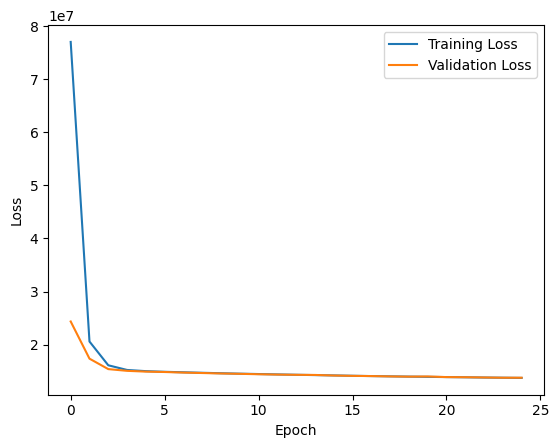

In [33]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**interpretando o grafico**
- A curva de perda de treinamento representa a perda do modelo durante o treinamento, medida em cada época. Ela indica o quão bem o modelo está se ajustando aos dados de treinamento à medida que o treinamento progride.

- A curva de perda de validação representa a perda do modelo em um conjunto de dados de validação, que não é usado para treinamento, mas sim para avaliar o desempenho geral do modelo.

- Quando as curvas de perda de treinamento e validação estão próximas e diminuindo, isso geralmente indica que o modelo está aprendendo bem e é capaz de generalizar para dados não vistos. É uma indicação positiva de que o modelo está progredindo adequadamente e está encontrando um bom ajuste para os dados.

No entanto, se a curva de perda de validação começar a aumentar ou divergir da curva de perda de treinamento, isso pode indicar que o modelo está sofrendo de overfitting (superajuste)

#### 12. Avaliação do modelo
- Após o treinamento, avalie o desempenho do seu modelo. Utilize o conjunto de teste para isso e calcule no mínimo 2 métricas de avaliação apropriadas.
***

In [34]:
 # Fazer previsões com o modelo
y_pred = model.predict(X_test)

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular o Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular o R-squared Score
r2 = r2_score(y_test, y_pred)

# Calcular o Adjusted R-squared Score
n = X_test.shape[0]  # número de amostras de teste
p = X_test.shape[1]  # número de atributos
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Imprimir as métricas
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared Score: ", r2)
print("Adjusted R-squared Score: ", adjusted_r2)

419/419 [==============================] - 0s 453us/step
Mean Squared Error (MSE):  13859256.240464205
Mean Absolute Error (MAE):  2976.947002688916
R-squared Score:  0.6245806465408626
Adjusted R-squared Score:  0.6242723054008603


In [35]:
# Criar um objeto MinMaxScaler para desnormalização
scaler = MinMaxScaler()
scaler.fit(y)  # Ajustar o scaler aos dados de destino original (antes da normalização)

# Desnormalizar as previsões
y_pred_desnormalized = scaler.inverse_transform(y_pred)

# Desnormalizar os valores verdadeiros
y_test_desnormalized = scaler.inverse_transform(y_test)

# Calcular as métricas usando os valores desnormalizados
mse = mean_squared_error(y_test_desnormalized, y_pred_desnormalized)
mae = mean_absolute_error(y_test_desnormalized, y_pred_desnormalized)
r2 = r2_score(y_test_desnormalized, y_pred_desnormalized)

n = X_test.shape[0]  # número de amostras de teste
p = X_test.shape[1]  # número de atributos
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Imprimir as métricas
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared Score: ", r2)
print("Adjusted R-squared Score: ", adjusted_r2)

Mean Squared Error (MSE):  9251038299458294.0
Mean Absolute Error (MAE):  76912403.7928385
R-squared Score:  0.6245806441235419
Adjusted R-squared Score:  0.6242723029815542


#### 13. Definição da Clusterização
- Utilize o método do cotovelo para descobrir qual a quantidade ideal de grupos para realizar uma clusterização. (para isto considere todas as colunas do dataframe como sendo parte dos atributos, inclusive o valor. Não esqueça de normalizar antes.)
***

A escolha do algoritmo de clusterização depende de vários fatores, como o tipo de dados, a estrutura dos clusters esperados, a escalabilidade do algoritmo, entre outros. Aqui estão alguns dos algoritmos de clusterização mais comuns e suas características principais:

- K-means: É um algoritmo de particionamento que divide os dados em k clusters, onde k é um valor pré-definido. Ele tenta minimizar a inércia dentro dos clusters, ou seja, a soma das distâncias quadradas entre cada ponto de dados e o centro do cluster ao qual ele pertence. O K-means é eficiente e fácil de implementar, mas requer a definição prévia do número de clusters.

- DBSCAN: É um algoritmo baseado em densidade que agrupa pontos de dados em regiões densas separadas por regiões com baixa densidade. Ele não requer a definição prévia do número de clusters e é capaz de lidar com clusters de forma arbitrária e com ruído nos dados.

- Hierarchical Clustering: É um algoritmo que constrói uma hierarquia de clusters, onde os clusters são formados iterativamente por meio da fusão ou divisão de clusters existentes. Existem duas abordagens principais: aglomerativa (começando com clusters individuais e mesclando-os) e divisiva (começando com um único cluster e dividindo-o em subclusters).

- Gaussian Mixture Models (GMM): É um modelo probabilístico que assume que os dados são gerados a partir de uma mistura de distribuições gaussianas. O GMM pode ser usado para encontrar clusters baseados na maximização da verossimilhança dos dados.

- Spectral Clustering: É um algoritmo que usa informações do espectro dos dados para realizar a clusterização. Ele mapeia os dados em um espaço de menor dimensão e, em seguida, aplica um algoritmo de clusterização tradicional, como K-means, nesse espaço reduzido.

In [49]:
X.describe(include= 'O')

,marca,resolucao_tela,tipo_tela,segmento
count,89362,89362,89362,89362
unique,11,4,5,8
top,xiaomi,FULLHD,OLED,premium
freq,8284,37209,27036,34169


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, adjusted_rand_score


# Identificar as colunas categóricas
categorical_cols = ['marca', 'resolucao_tela', 'tipo_tela', 'segmento']

# Criar o objeto ColumnTransformer para aplicar a transformação
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Aplicar a transformação aos dados
X_encoded = ct.fit_transform(X)

# Aplicar o algoritmo de clusterização (por exemplo, K-means)
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_encoded)

# Obter os rótulos atribuídos pelo algoritmo
y_pred = kmeans.labels_

# Calcular a inércia
inertia = kmeans.inertia_

# Calcular o índice de silhueta
silhouette = silhouette_score(X_encoded, y_pred)

y_true = y_test['valor'].values.ravel()
y_pred_subtest = y_pred[:len(y_true)]
# Calcular o coeficiente de Rand ajustado
rand_adjusted = adjusted_rand_score(y_true, y_pred_subtest)

# Imprimir as métricas
print("Inertia: ", inertia)
print("Silhouette Score: ", silhouette)
print("Adjusted Rand Score: ", rand_adjusted)


C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia:  9725150931.63825
Silhouette Score:  0.5239853635551015
Adjusted Rand Score:  8.533448770593772e-09


A interpretação dos resultados das métricas de clusterização pode variar dependendo da métrica em questão. Aqui está uma explicação geral de como interpretar as métricas comuns:

- Inércia: A inércia mede a soma das distâncias quadráticas entre cada ponto de dados e o centro do cluster mais próximo. Quanto menor a inércia, melhor, pois indica que os pontos dentro de cada cluster estão mais próximos uns dos outros. No entanto, a inércia não fornece informações sobre a separação entre os clusters.

- Índice de Silhueta: O índice de silhueta mede o quão bem cada amostra se encaixa em seu próprio cluster em comparação com outros clusters. O valor varia de -1 a 1, onde um valor próximo de 1 indica que a amostra está bem ajustada ao seu próprio cluster, um valor próximo de 0 indica sobreposição entre os clusters e um valor próximo de -1 indica que a amostra pode ter sido atribuída ao cluster errado. Um índice de silhueta médio próximo de 1 é desejável, indicando uma boa separação dos clusters.

- Coeficiente de Rand Ajustado: O coeficiente de Rand ajustado mede a similaridade entre os rótulos atribuídos pelo algoritmo de clusterização e os rótulos verdadeiros. O valor varia de -1 a 1, onde 1 indica uma concordância perfeita entre os rótulos e -1 indica uma discordância completa. Um valor próximo de 1 é desejável, indicando que o algoritmo de clusterização produziu rótulos semelhantes aos rótulos verdadeiros.

In [51]:
k_values = range(1, 11)  # Teste valores de 1 a 10 para k
inertias = []  # Lista para armazenar os valores da inércia

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_normalized)
    inertias.append(kmeans.inertia_)

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

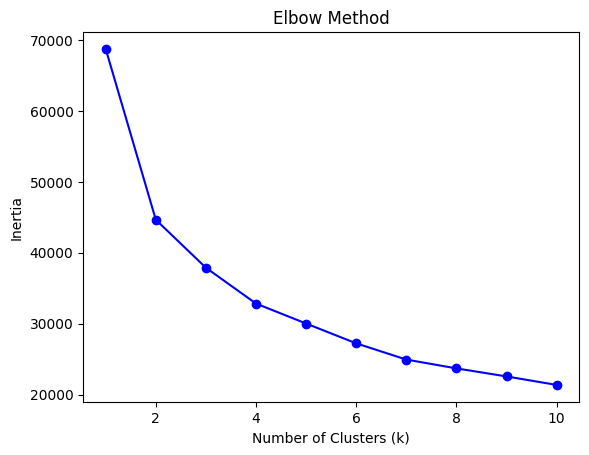

In [52]:
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


No gráfico, o cotovelo é identificado como o ponto onde a redução da inércia começa a diminuir significativamente ou quando a curva se torna mais suave. A partir desse ponto, adicionar mais clusters não trará ganhos significativos na explicação da variabilidade dos dados. Portanto, o número de clusters correspondente ao cotovelo é considerado como a quantidade ideal para a clusterização.

#### 14. Avaliação do modelo
- Treine um algoritmo de clusterização com a quantidade de grupos identificada pelo método do cotovelo.
***

In [53]:
from sklearn.cluster import SpectralClustering, KMeans

# Aplicar o SpectralClustering
#spectral_clustering = SpectralClustering(n_clusters=4)  # ou n_clusters=4
#spectral_clustering.fit(X_normalized)
#labels_spectral = spectral_clustering.labels_

#vai muita memoria ram, parei antes

In [54]:
k = 4

# Instanciar e ajustar o modelo K-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_normalized)

# Obter as etiquetas dos clusters
labels = kmeans.labels_
k =  4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_normalized)


C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

#### 15. Avaliação do clusters
- Exiba 4 gráficos diferentes para exibir e avaliar os grupos de clusters identificados.
***

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89362 entries, 10 to 89999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              89362 non-null  object 
 1   ano                89362 non-null  int64  
 2   qtd_nucleos        89362 non-null  int64  
 3   qtd_threads        89362 non-null  float64
 4   ram                89362 non-null  int64  
 5   gpu_dedicada       89362 non-null  int64  
 6   ram_gpu            89362 non-null  int64  
 7   entradas_usb       89362 non-null  float64
 8   duracao_bateria    89362 non-null  float64
 9   resolucao_tela     89362 non-null  object 
 10  tipo_tela          89362 non-null  object 
 11  tela_touch         89362 non-null  int64  
 12  armazenamento_hdd  89362 non-null  int64  
 13  armazenamento_ssd  89362 non-null  float64
 14  segmento           89362 non-null  object 
dtypes: float64(4), int64(7), object(4)
memory usage: 10.9+ MB


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89362 entries, 10 to 89999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marca              89362 non-null  object 
 1   ano                89362 non-null  int64  
 2   qtd_nucleos        89362 non-null  int64  
 3   qtd_threads        89362 non-null  float64
 4   ram                89362 non-null  int64  
 5   gpu_dedicada       89362 non-null  int64  
 6   ram_gpu            89362 non-null  int64  
 7   entradas_usb       89362 non-null  float64
 8   duracao_bateria    89362 non-null  float64
 9   resolucao_tela     89362 non-null  object 
 10  tipo_tela          89362 non-null  object 
 11  tela_touch         89362 non-null  int64  
 12  armazenamento_hdd  89362 non-null  int64  
 13  armazenamento_ssd  89362 non-null  float64
 14  segmento           89362 non-null  object 
 15  valor              89362 non-null  int64  
dtypes: float64(4), int64(8), o

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


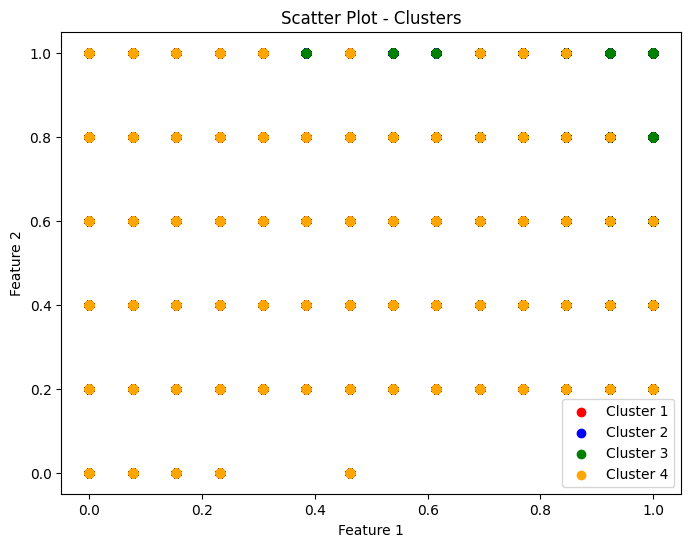

In [56]:
k = 4

# Instanciar e ajustar o modelo K-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_normalized)

# Obter as etiquetas dos clusters
labels_kmeans = kmeans.labels_

# Definir as cores para cada cluster
colors = ['red', 'blue', 'green', 'orange']

# Plotar o scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = X_normalized[labels_kmeans == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster], label=f'Cluster {cluster+1}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot - Clusters')
plt.legend()
plt.show()

C:\Users\Leão Neto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: x and y must be the same size

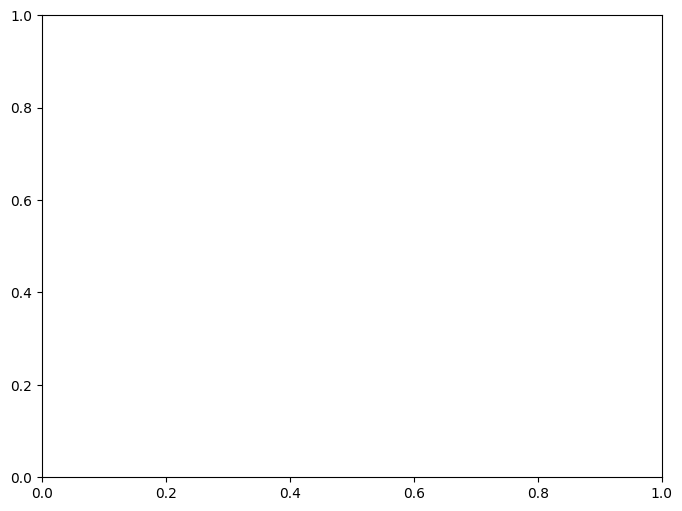

In [59]:
k = 4

# Instanciar e ajustar o modelo K-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_normalized)

# Obter as etiquetas dos clusters
labels_kmeans = kmeans.labels_

# Definir as cores para cada cluster
colors = ['red', 'blue', 'green', 'orange']

# Plotar o scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_points = X_normalized[labels_kmeans == cluster]
    plt.scatter(df[['valor']], cluster_points[:, 3], c=colors[cluster], label=f'Cluster {cluster+1}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 4')  # Atualização do label do eixo y
plt.title('Scatter Plot - Clusters')
plt.legend()
plt.show()


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (4).

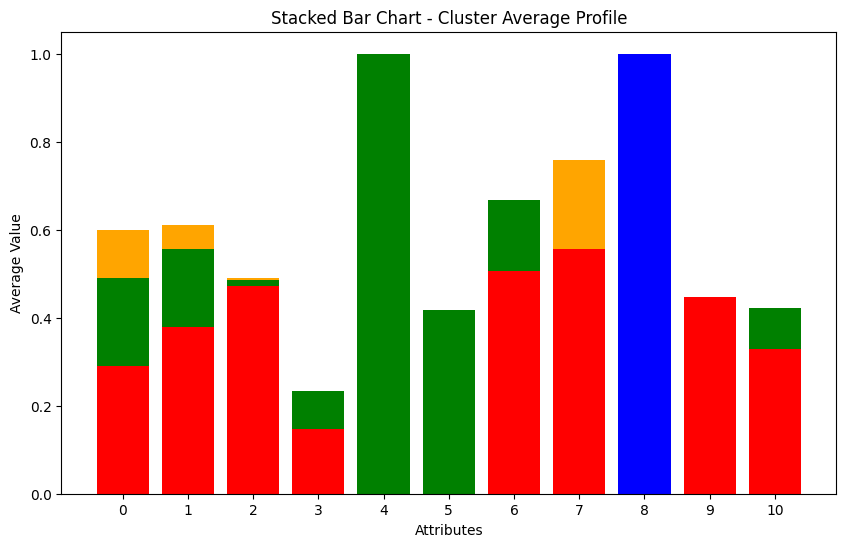

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média dos valores para cada atributo e cluster
cluster_means = []
for cluster in range(k):
    cluster_mean = np.mean(X_normalized[labels_kmeans == cluster], axis=0)
    cluster_means.append(cluster_mean)

# Transpor a matriz de médias para ter os atributos como colunas
cluster_means = np.array(cluster_means).T

# Plotar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
num_attributes = cluster_means.shape[0]
x = np.arange(num_attributes)
colors = ['blue', 'orange', 'green', 'red']  # Cores para cada cluster
labels = [f'Cluster {cluster+1}' for cluster in range(k)]
for i in range(k):
    plt.bar(x, cluster_means[:, i], label=labels[i], color=colors[i])
plt.xlabel('Attributes')
plt.ylabel('Average Value')
plt.title('Stacked Bar Chart - Cluster Average Profile')
plt.xticks(x, attributes)  # Substitua 'attributes' pelos nomes dos atributos
plt.legend()
plt.show()


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (4).

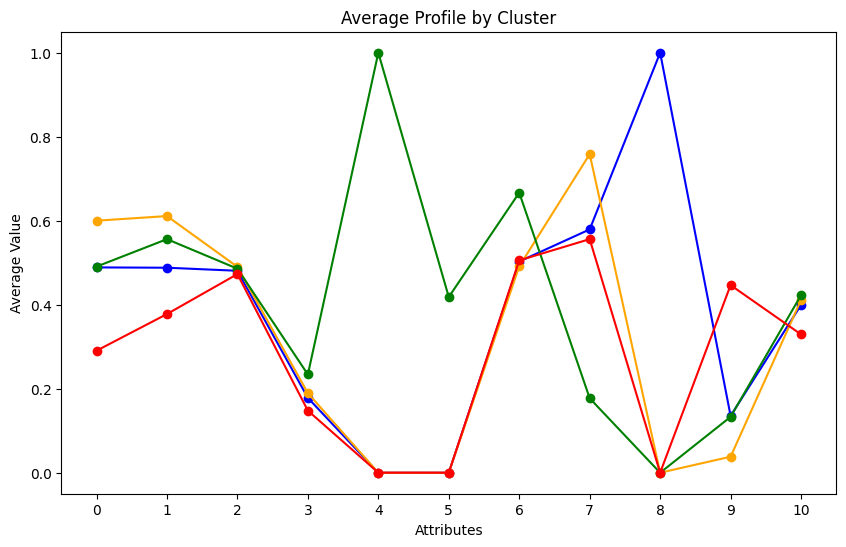

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média dos valores para cada atributo e cluster
cluster_means = []
for cluster in range(k):
    cluster_mean = np.mean(X_normalized[labels_kmeans == cluster], axis=0)
    cluster_means.append(cluster_mean)

# Transpor a matriz de médias para ter os atributos como colunas
cluster_means = np.array(cluster_means).T

# Plotar o gráfico de perfil médio
plt.figure(figsize=(10, 6))
num_attributes = cluster_means.shape[0]
x = np.arange(num_attributes)
colors = ['blue', 'orange', 'green', 'red']  # Cores para cada cluster
labels = [f'Cluster {cluster+1}' for cluster in range(k)]
for i in range(k):
    plt.plot(x, cluster_means[:, i], label=labels[i], color=colors[i], marker='o')
plt.xlabel('Attributes')
plt.ylabel('Average Value')
plt.title('Average Profile by Cluster')
plt.xticks(x, attributes)  # Substitua 'attributes' pelos nomes dos atributos
plt.legend()
plt.show()


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of labels (4).

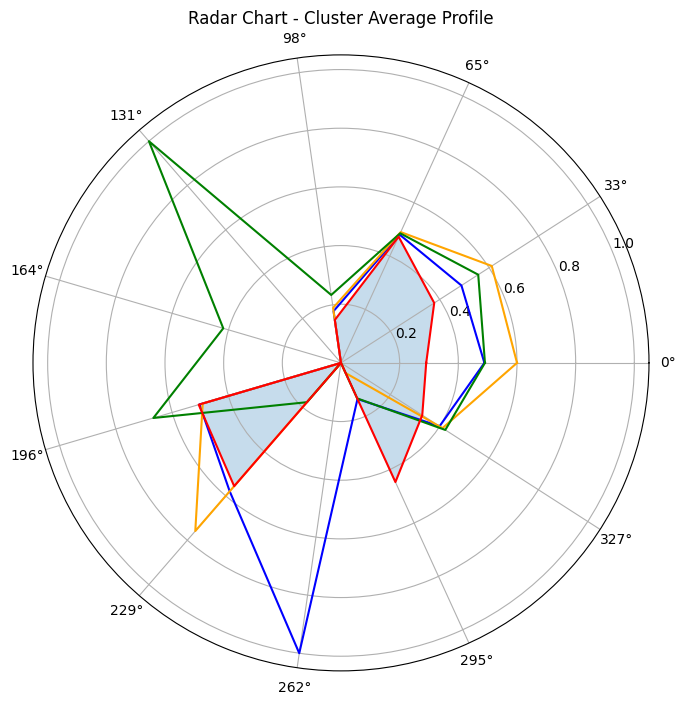

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a média dos valores para cada atributo e cluster
cluster_means = []
for cluster in range(k):
    cluster_mean = np.mean(X_normalized[labels_kmeans == cluster], axis=0)
    cluster_means.append(cluster_mean)

# Transpor a matriz de médias para ter os atributos como colunas
cluster_means = np.array(cluster_means).T

# Plotar o gráfico de radar
plt.figure(figsize=(8, 8))
num_attributes = cluster_means.shape[0]
angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1]  # Adicionar o primeiro ângulo no final para fechar o gráfico
colors = ['blue', 'orange', 'green', 'red']  # Cores para cada cluster
labels = [f'Cluster {cluster+1}' for cluster in range(k)]
for i in range(k):
    values = cluster_means[:, i].tolist()
    values += values[:1]  # Adicionar o primeiro valor no final para fechar o polígono
    plt.polar(angles, values, label=labels[i], color=colors[i])
plt.fill(angles, values, alpha=0.25)  # Preencher o polígono com transparência
plt.title('Radar Chart - Cluster Average Profile')
plt.xticks(angles[:-1], attributes)  # Substitua 'attributes' pelos nomes dos atributos
plt.legend()
plt.show()
